# [**Précision-Rappel**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/3_model_selection/plot_precision_recall.ipynb)<br/>([_Precision-Recall_](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html))

Exemple de mesure de précision-rappel pour évaluer la qualité des prédictions d'un classifieur.

La précision-rappel est une mesure utile pour évaluer les prédictions lorsque les classes sont très déséquilibrées. En recherche d'informations, la précision est une mesure de la pertinence des résultats, tandis que le rappel mesure le nombre de résultats réellement pertinents renvoyés.

La courbe précision-rappel montre le compromis entre la précision et le rappel pour différents seuils. Une grande aire sous la courbe représente à la fois une grande précision et un grand rappel, où une grande précision est liée à un faible taux de faux positifs et un grand rappel est lié à un faible taux de faux négatifs. Des scores élevés pour les deux montrent que le classifieur renvoie des résultats précis (haute précision) tout en renvoyant la majorité de tous les résultats positifs (grand rappel).

Un système avec un grand rappel mais une faible précision renvoie de nombreux résultats, mais la plupart de ses étiquettes prévues sont incorrectes par rapport aux étiquettes d'entraînement. Un système avec une grande précision mais un faible rappel est juste le contraire, renvoyant très peu de résultats, mais la plupart de ses étiquettes prévues sont correctes par rapport aux étiquettes d'entraînement. Un système idéal avec une grande précision et un grand rappel renverra de nombreux résultats, tous correctement étiquetés.

La précision ($P$) est définie comme le nombre de vrais positifs ($T_p$) divisé par le nombre de vrais positifs plus le nombre de faux positifs ($F_p$).

$$\displaystyle P = \frac{T_p}{T_p+F_p}$$

Le rappel ($R$) est défini comme le nombre de vrais positifs ($T_p$) divisé par le nombre de vrais positifs plus le nombre de faux négatifs ($F_n$).

$$\displaystyle R = \frac{T_p}{T_p + F_n}$$

Ces quantités sont également liées au score $F_1$, qui est défini comme la moyenne harmonique de la précision et du rappel.

$$\displaystyle F_1 = 2\frac{P \times R}{P+R}$$

Il est important de noter que la précision peut ne pas diminuer avec le rappel. La définition de la précision ($\frac{T_p}{T_p + F_p}$) montre que la diminution du seuil d'un classifieur peut augmenter le dénominateur, en augmentant le nombre de résultats renvoyés. Si le seuil était précédemment trop élevé, les nouveaux résultats peuvent tous être de vrais positifs, ce qui augmentera la précision. Si le seuil précédent était approximativement correct ou trop faible, une diminution supplémentaire du seuil introduira des faux positifs, réduisant la précision.

Le rappel est défini comme $\frac{T_p}{T_p + F_n}$, où $T_p + F_n$ ne dépend pas du seuil du classifieur. Cela signifie que la diminution du seuil du classifieur peut augmenter le rappel, en augmentant le nombre de résultats vrais positifs. Il est également possible que la diminution du seuil ne modifie pas le rappel, tandis que la précision fluctue.

La relation entre le rappel et la précision peut être observée dans la zone d'escalier du graphique - aux extrémités de ces marches, un petit changement de seuil réduit considérablement la précision, avec seulement un gain mineur de rappel.

**La précision moyenne** (AP) résume un tel graphique en tant que moyenne pondérée des précisions atteintes à chaque seuil, l'augmentation du rappel depuis le seuil précédent étant utilisée comme poids :

$$\text{AP} = \sum_n (R_n - R_{n-1}) P_n$$

où $P_n$ et $R_n$ sont la précision et le rappel au nième seuil. Une paire $(R_k, P_k)$ est appelée _point de fonctionnement_.

AP et l'aire sous la courbe des points de fonctionnement ([**`sklearn.metrics.auc`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)) sont des moyens courants de résumer une courbe précision-rappel qui conduisent à des résultats différents. Pour en savoir plus, consultez le [**Guide de l'utilisateur** (3.3.2.9)](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics).

Les courbes précision-rappel sont généralement utilisées en classification binaire pour étudier la sortie d'un classifieur. Pour étendre la courbe précision-rappel et la précision moyenne à une classification multi-classes ou multi-étiquettes, il est nécessaire de binariser la sortie. Une courbe peut être tracée par étiquette, mais on peut également tracer une courbe précision-rappel en considérant chaque élément de la matrice d'indicateurs d'étiquettes comme une prédiction binaire (moyenne micro).

> **Note:** Voir également [**`average_precision_score`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html), [**`recall_score`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [**`precision_score`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [**`f1_score`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

# Dans les paramètres de classification binaire

## Jeu de données et modèle

Nous utiliserons un classifieur Linear SVC pour différencier deux types d'iris.

In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X[y < 2], y[y < 2], test_size=0.5, random_state=random_state
)

Linear SVC s'attend à ce que chaque caractéristique ait une gamme de valeurs similaire. Ainsi, nous mettrons d'abord à l'échelle les données à l'aide d'un [**`StandardScaler`**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(
    StandardScaler(), LinearSVC(random_state=random_state, dual="auto")
)
classifier.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(dual='auto',
                           random_state=RandomState(MT19937) at 0x1EE9D87F540))])

## Tracer la courbe précision-rappel

Pour tracer la courbe précision-rappel, vous devez utiliser PrecisionRecallDisplay. En effet, il y a deux méthodes disponibles en fonction que vous ayez déjà calculé les prédictions du classifieur ou non.

Commençons d'abord par tracer la courbe précision-rappel sans les prédictions du classifieur. Nous utilisons from_estimator qui calcule les prédictions pour nous avant de tracer la courbe.

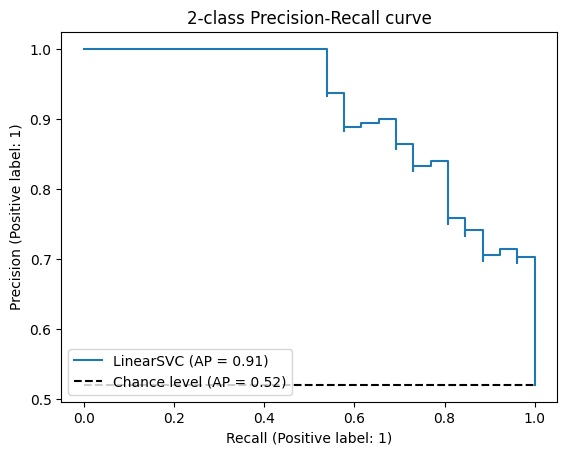

In [3]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LinearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Si nous avons déjà les probabilités ou les scores estimés pour notre modèle, alors nous pouvons utiliser [**`from_predictions`**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html).

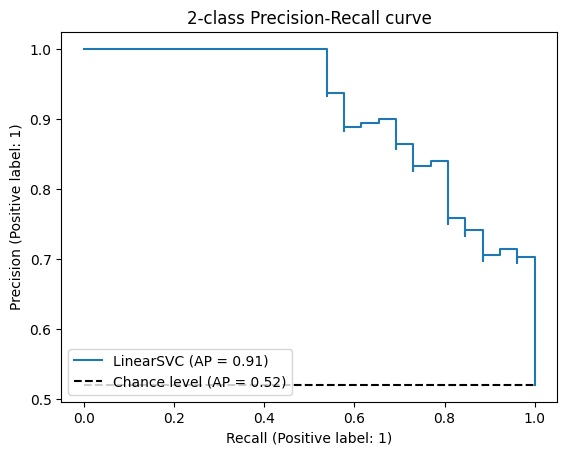

In [4]:
y_score = classifier.decision_function(X_test)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="LinearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

# En cas de configuration multi-étiquettes

La courbe précision-rappel ne prend pas en charge la configuration multi-étiquettes. Cependant, on peut décider comment traiter ce cas. Nous montrons un exemple ci-dessous.

## Créer des données multi-étiquettes, ajuster et prédire

Nous créons un ensemble de données multi-étiquettes pour illustrer la précision-rappel dans les paramètres multi-étiquettes.

In [5]:
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.5, random_state=random_state
)

Nous utilisons [**`OneVsRestClassifier`**](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) pour la prédiction multi-étiquettes.

In [8]:
from sklearn.multiclass import OneVsRestClassifier

classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LinearSVC(random_state=random_state, dual="auto"))
)
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

## Le score de précision moyenne dans les paramètres multi-étiquettes

In [9]:
from sklearn.metrics import average_precision_score, precision_recall_curve

# For each class
precision = {}
recall = {}
average_precision = {}
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

## Tracer la courbe précision-rappel micro-avérée

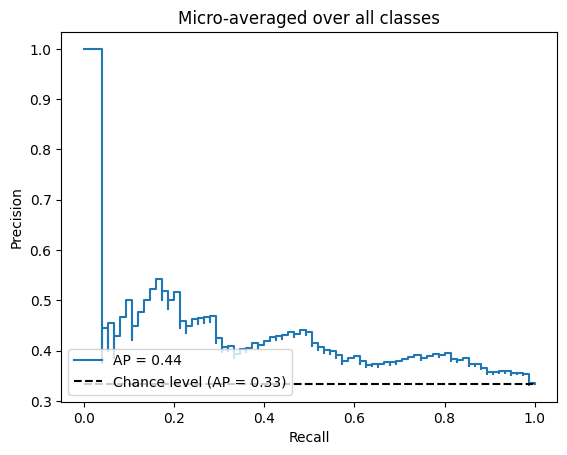

In [10]:
from collections import Counter

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
    prevalence_pos_label=Counter(Y_test.ravel())[1] / Y_test.size,
)
display.plot(plot_chance_level=True)
_ = display.ax_.set_title("Micro-averaged over all classes")

## Tracer la courbe précision-rappel pour chaque classe et les courbes iso-F1

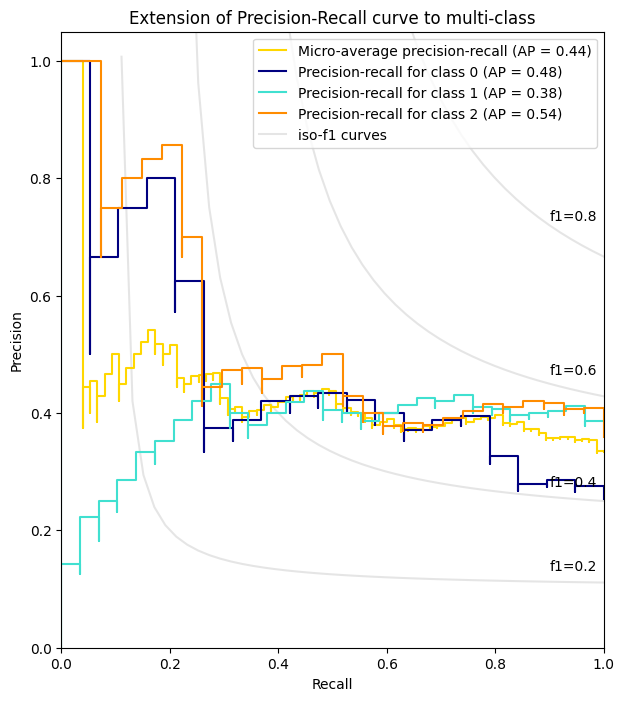

In [11]:
from itertools import cycle

import matplotlib.pyplot as plt

# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()